## Neural networks for segmentation

In [ ]:
# ! wget https://www.dropbox.com/s/jy34yowcf85ydba/data.zip?dl=0 -O data.zip
# ! unzip -q data.zip

In [2]:
# !pip install pydot


In [3]:
# from PIL import Image
# import glob
# import numpy as np
# import matplotlib.pyplot as plt
# import imageio

# from skimage import filters
# from skimage.data import camera
# from skimage.util import compare_images

# #Pixels higher than this will be 1. Otherwise 0.
# THRESHOLD_VALUE = 254

# files_target = glob.glob('Cube/target/*.png') # Use *.* if you're sure all are images
# files_valy = glob.glob('Cube/valy/*.png')
# files = [files_target,files_valy]
# for pth in files:
#     for f in pth:

#     #Load image and convert to greyscale
#     #     img = Image.open("Cube/target/SampleScene_1_layer.png")
#         img = Image.open(f)
#         img = img.convert("L")

#         imgData = np.asarray(img)
        
#         fon = (imgData < THRESHOLD_VALUE) * 1.0
#         thresholdedData = (imgData > THRESHOLD_VALUE) * 255.0
#         thresholdedData = fon + thresholdedData
# #         thresholdedData = (imgData > THRESHOLD_VALUE) / 120.0
# #         alls = thresholdedData.astype(np.float32)
        
# #         edge_roberts = filters.roberts(imgData)
# #         edge_sobel = filters.sobel(thresholdedData)
# #         contour = (edge_sobel > 0) * 255.0
# #         contour = (edge_roberts > 0) * 2.0
# #         contour = contour +thresholdedData
        
# #         thresholdedData = thresholdedData + contour
        
        
# #         thresholdedData = edge_roberts
# #         thresholdedData = edge_sobel
# #         thresholdedData = (thresholdedData > 1) * 255.0
# #         thresholdedData = thresholdedData.astype(np.float32)
# #         norm = np.linalg.norm(thresholdedData)
# #         thresholdedData = thresholdedData/norm
#     #     thresholdedData = (thresholdedData > THRESHOLD_VALUE) * 255.0
#     #     thresholdedData = thresholdedData.astype(np.float32)
#     #     simage = Image.fromarray(thresholdedData)
#     #     out = f[:f.rfind('.')]
#     #     print(f)
#     #     simage.save('%s.png'%f)
#     #     simage.save("test.png")
#         # thresholdedData.save("test.png")
#     #     plt.imshow(simage)
#     #     plt.show()
# #         break
# #         thresholdedData[100:250, 240:250]
#         imageio.imwrite('test/' + '%s.png'%f, thresholdedData)

#     #     imageio.imwrite('%s.png'%f, thresholdedData)

#     #     break
#     #     print(imgData[100:250, 240:250], type(imgData))
#     # thresholdedData[100:250, 240:250]
# #         print(thresholdedData[100:250, 240:250])

# # plt.figure(figsize=(20,8))

# # plt.subplot(1,4,1)
# # plt.imshow(edge_sobel)

# # plt.subplot(1,4,2)
# # plt.imshow(contour)

# # plt.subplot(1,4,3)
# # plt.imshow(alls)

# # plt.subplot(1,4,4)
# # plt.imshow(imgData)
# # print(contour[150:160, 240:250])
# imgData

In [4]:
# from skimage import color
# files_target = glob.glob('Cube/valX/*.png') # Use *.* if you're sure all are images
# files_valy = glob.glob('Cube/features/*.png')
# files = [files_target,files_valy]
# for pth in files:
#     for f in pth:
#         img = Image.open(f)
# #         img = img.convert("L")
#         img = np.asarray(img)
#         img = color.convert_colorspace(img, 'RGB', 'rgb')
#         img = color.rgb2gray(img)
# #         img = np.array([img,img,img])
# #         img = color.gray2rgba(img)
#         img = color.convert_colorspace(img, 'RGB', 'rgb')
#         break
# #         img = rgb2gray(img)
# #         img = gray2rgb(img)
# #         imageio.imwrite('test/' + '%s.png'%f, img)

# fon[150:160, 240:250]
# contour[140:180, 240:250]
# plt.figure(figsize=(20,20))

# plt.subplot(1,3,1)
# # im = skimage.img_as_ubyte(s[0])
# plt.imshow(alls, 'gray')
# thresholdedData.sum()

In [5]:
# img.shape

In [6]:
# print(thresholdedData[150:250, 240:250])
# print(thresholdedData.sum())

Your next task is to train neural network to segment cells edges.

Here is an example of input data with corresponding ground truth:

In [7]:
# from scipy.misc import Imsave
import scipy as sp
import scipy.misc
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage
import os
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

SEED = 124

In [8]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.Session(config=config)

# tf.config.gpu.set_per_process_memory_fraction(0.4)

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 4GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


print(tf.test.gpu_device_name())

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6859564157939810514
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4294967296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10046282801849098149
physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [11]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12658588372801528731
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4294967296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2941058189915924390
physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [12]:
# # Human HT29 colon-cancer cells
# # plt.figure(figsize=(10,8))
# # plt.subplot(1,2,1)
# # im = skimage.img_as_ubyte(skimage.io.imread('BBBC018_v1_images-fixed/train/00735-actin.DIB.bmp'))
# # plt.imshow(im)
# # plt.subplot(1,2,2)
# # mask = skimage.img_as_ubyte(skimage.io.imread('BBBC018_v1_outlines/train/00735-cells.png'))
# # plt.imshow(mask, 'gray')

# plt.figure(figsize=(10,8))
# plt.subplot(1,2,1)
# im = skimage.img_as_ubyte(skimage.io.imread('Cube/features/SampleScene_1_img.png'))
# plt.imshow(im)
# plt.subplot(1,2,2)
# mask = skimage.img_as_ubyte(skimage.io.imread('Cube/test/target/SampleScene_1_layer.png.png'))
# plt.imshow(skimage.img_as_ubyte(skimage.io.imread('BBBC018_v1_outlines/train/00735-cells.png')))

# # skimage.img_as_ubyte(skimage.io.imread('Cube/test/target/SampleScene_1_layer.png.png'))[100:250, 240:250]
# skimage.img_as_ubyte(skimage.io.imread('BBBC018_v1_outlines/train/00735-cells.png'))[:250, 240:250]


In [13]:
# plt.imshow(skimage.img_as_ubyte(skimage.io.imread('Cube/target/SampleScene_1_layer.png.png')))
# a = skimage.io.imread('Cube/target/SampleScene_1_layer.png.png')
# a

This time you aren't provided with any code snippets, just input data and target metric - intersection-over-union (IoU) (see implementation below).

You should train neural network to predict mask of edge pixels (pixels in gt images with value greater than 0).

Use everything you've learnt by now: 
* any architectures for semantic segmentation (encoder-decoder like or based on dilated convolutions)
* data augmentation (you will need that since train set consists of just 41 images)
* fine-tuning

You're not allowed to do only one thing: to train you network on test set.

Your final solution will consist of an ipython notebook with code (for final network training + any experiments with data) and an archive with png images with network predictions for test images (one-channel images, 0 - for non-edge pixels, any non-zero value for edge pixels).

Forestalling questions about baseline... well, let's say that a good network should be able to segment images with iou >= 0.29. This is not a strict criterion of full points solution, but try to obtain better numbers.

Practical notes:
* There is a hard data class imbalance in dataset, so the network output will be biased toward "zero" class. You can either tune the minimal probability threshold for "edge" class, or add class weights to increase the cost of edge pixels in optimized loss.
* Dataset is small so actively use data augmentation: rotations, flip, random contrast and brightness
* Better spend time on experiments with neural network than on postprocessing tricks (i.e test set augmentation).
* Keep in mind that network architecture defines receptive field of pixel. If the size of network input is smaller than receptive field of output pixel, than probably you can throw some layers without loss of quality. It is ok to modify "of-the-shelf" architectures. 

Good luck!

In [14]:
# For TORCH!

# def calc_iou(prediction, ground_truth):
#     n_images = len(prediction)
#     intersection, union = 0, 0
#     for i in range(n_images):
#         intersection += np.logical_and(prediction[i] > 0, ground_truth[i] > 0).astype(np.float32).sum() 
#         union += np.logical_or(prediction[i] > 0, ground_truth[i] > 0).astype(np.float32).sum()
#     return float(intersection) / union

In [15]:
X_files = os.listdir('Cube/features/')
y_files = os.listdir('Cube/target/')

In [16]:
X_base = [skimage.img_as_ubyte(skimage.io.imread('Cube/features/' + i)) for i in X_files]
y_base = [skimage.img_as_ubyte(skimage.io.imread('Cube/target/' + i)) for i in y_files]

In [17]:
print(len(X_base), len(y_files))

360 361


# Get data with KERAS

## Get X data

In [18]:
train_datagen_X = keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
    rescale=1. / 255,
#     zoom_range=[0.2, 1.0],
#     vertical_flip=True,
#     horizontal_flip=True
)

train_generator_X = train_datagen_X.flow_from_directory(
    'Cube/',
    classes=['features'],
#     'BBBC018_v1_images-fixed/',
#     classes=['train'],
    target_size=(512, 512),
    batch_size=2,
    seed=SEED,
    class_mode=None)

Found 360 images belonging to 1 classes.


In [19]:
val_datagen_X = keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
    rescale=1. / 255,
)
# val_datagen_X = keras.preprocessing.image.ImageDataGenerator()

val_generator_X = val_datagen_X.flow_from_directory(
    'Cube/',
#     'BBBC018_v1_images-fixed/',
    classes=['valX'],
#     classes=['val'],
    target_size=(512, 512),
    batch_size=1,
    seed=SEED,
    class_mode=None)

Found 37 images belonging to 1 classes.


## Get y data

In [20]:
train_datagen_y = keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
    rescale=1. / 255,
#     zoom_range=[0.2, 1.0],
#     vertical_flip=True,
#     horizontal_flip=True
)

train_generator_y = train_datagen_y.flow_from_directory(
    'test/Cube/',
#     'BBBC018_v1_outlines/',
    classes=['target'],
#     classes=['train'],
#     class_mode='binary',
    color_mode='grayscale',
    target_size=(512, 512),
    batch_size=2,
    seed=SEED,
    class_mode=None)

Found 360 images belonging to 1 classes.


In [21]:
# train_generator_y[1][0,200:250, 240:250]
# a = train_generator_y[0]

In [22]:
# val_generator_y[0].reshape(512,512)[]

In [23]:
val_datagen_y = keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
    rescale=1. / 255,
)
# val_datagen_y = keras.preprocessing.image.ImageDataGenerator()

val_generator_y = val_datagen_y.flow_from_directory(

    'test/Cube/',
#     'BBBC018_v1_outlines/',
    classes=['valy'],
#     classes=['val'],
    color_mode='grayscale',
    target_size=(512, 512),
    batch_size=1,
    seed=SEED,
    class_mode=None)

Found 37 images belonging to 1 classes.


In [24]:
print( train_generator_y[0].shape)
print( train_generator_X[0].shape)
print( val_generator_y[0].shape)
print( val_generator_X[0].shape)

(2, 512, 512, 1)
(2, 512, 512, 3)
(1, 512, 512, 1)
(1, 512, 512, 3)


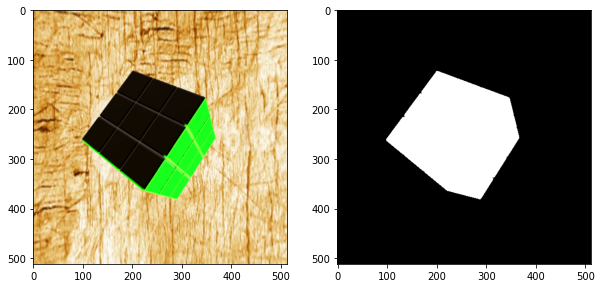

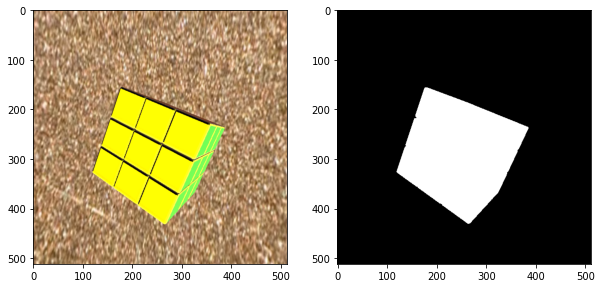

In [25]:
for i in range(2):
    for image_rgb, image_grayscale in zip(train_generator_X[i], train_generator_y[i]):
        plt.figure(figsize=(10,8))
        plt.subplot(1,2,1)
        im = skimage.img_as_ubyte(image_rgb)
#         print(image_rgb)
        plt.imshow(im)
        plt.subplot(1,2,2)
#         mask = skimage.img_as_ubyte(image_grayscale).reshape((512, 512))
        mask = skimage.img_as_ubyte(image_grayscale)[:,:,0]
        plt.imshow(mask,'gray')
#         print(mask[200:300, 200:300])
    break


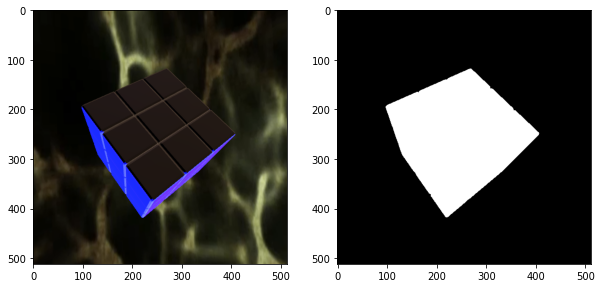

In [26]:
for i in range(2):
    for image_rgb, image_grayscale in zip(val_generator_X[i], val_generator_y[i]):
        plt.figure(figsize=(10,8))
        plt.subplot(1,2,1)
        im = skimage.img_as_ubyte(image_rgb)
#         print(image_rgb)
        plt.imshow(im)
        plt.subplot(1,2,2)
#         mask = skimage.img_as_ubyte(image_grayscale).reshape((512, 512))
        mask = skimage.img_as_ubyte(image_grayscale)[:,:,0]
        plt.imshow(mask,'gray')
#         print(mask[200:300, 200:300])
    break


In [27]:
# train_generator_y[0]

# Create model (try to U-NET)
![U-NET model](https://miro.medium.com/max/1360/1*TXfEPqTbFBPCbXYh2bstlA.png)

In [28]:
from tensorflow.keras.activations import swish
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Reshape, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Adagrad

inputs = Input((512,512,3))

conv1 = Conv2D(64, 3, activation=swish, padding='same')(inputs)
conv1 = Conv2D(64, 3, activation=swish, padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(128, 3, activation=swish, padding='same')(pool1)
conv2 = Conv2D(128, 3, activation=swish, padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(256, 3, activation=swish, padding='same')(pool2)
conv3 = Conv2D(256, 3, activation=swish, padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(512, 3, activation=swish, padding='same')(pool3)
conv4 = Conv2D(512, 3, activation=swish, padding='same')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation=swish, padding='same')(pool4)
conv5 = Conv2D(1024, 3, activation=swish, padding='same')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation=swish, padding='same')(UpSampling2D(size=(2,2), interpolation='bilinear')(drop5))
concat6 = tf.concat([conv4,up6], axis=-1)
conv6 = Conv2D(512, 3, activation=swish, padding='same')(concat6)
conv6 = Conv2D(512, 3, activation=swish, padding='same')(conv6)

up7 = Conv2D(256, 2, activation=swish, padding='same')(UpSampling2D(size=(2,2), interpolation='bilinear')(conv6))
concat7 = tf.concat([conv3,up7], axis=-1)
conv7 = Conv2D(256, 3, activation=swish, padding='same')(concat7)
conv7 = Conv2D(256, 3, activation=swish, padding='same')(conv7)

up8 = Conv2D(128, 2, activation=swish, padding='same')(UpSampling2D(size=(2,2), interpolation='bilinear')(conv7))
concat8 = tf.concat([conv2,up8], axis=-1)
conv8 = Conv2D(128, 3, activation=swish, padding='same')(concat8)
conv8 = Conv2D(128, 3, activation=swish, padding='same')(conv8)

up9 = Conv2D(64, 2, activation=swish, padding='same')(UpSampling2D(size=(2,2), interpolation='bilinear')(conv8))
concat9 = tf.concat([conv1,up9], axis=-1)
conv9 = Conv2D(64, 3, activation=swish, padding='same')(concat9)
conv9 = Conv2D(64, 3, activation=swish, padding='same')(conv9)
conv9 = Conv2D(2, 3, activation=swish, padding='same')(conv9)
conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

resh = Reshape((512, 512))(conv10)

model = keras.Model(inputs=inputs, outputs=resh)

model._layers = [layer for layer in model._layers if not isinstance(layer, dict)]

In [29]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

# Calculate loss

In [31]:
def jaccdist_metr(y_true, y_pred, smooth=100):
    intersection = tf.reduce_sum(y_true * y_pred, axis=(1, 2))
    jac_sum = tf.reduce_sum(y_true + y_pred, axis=(1, 2))
    return (intersection + smooth) / (jac_sum - intersection + smooth)

def jaccdist_loss(y_true, y_pred, smooth=100):
    return (1 - jaccdist_metr(y_true, y_pred, smooth)) * smooth

# Fit model

In [32]:
def show_pred(image=skimage.io.imread('Cube/features/SampleScene_170_img.png')):
    s = np.array([image,image])
    im = skimage.img_as_ubyte(s[0])
    mask = skimage.img_as_ubyte(model.predict(s)[0])
    re_mask = skimage.img_as_ubyte(model.predict(s/255.0)[0])
    # re_mask = create_mask(re_mask)
    plt.figure(figsize=(20,8))

    plt.subplot(2,3,1)
    plt.imshow(im)

    plt.subplot(2,3,4)
    plt.imshow(im[:,:, 0])

    plt.subplot(2,3,2)
    plt.imshow(mask, 'gray')

    plt.subplot(2,3,5)
    plt.imshow(mask)

    plt.subplot(2,3,3)
    plt.imshow(re_mask, 'gray')

    plt.subplot(2,3,6)
    plt.imshow(re_mask)

In [41]:
# import pprint
# import inspect

model.compile(optimizer=Adam(lr=1e-4), loss='mse', metrics=[tf.keras.metrics.MeanIoU(2), jaccdist_metr])
# model.compile(optimizer=Adam(lr=1e-4), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

reduce_lr_loss = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.05,
#     patience=5,
    verbose=1,
    min_delta=1e-5, 
    mode='max',
#     mode='auto',
    min_lr=1e-7,
    
)
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
#         clear_output(wait=True)
       pass
#         print ('\nSample Prediction after epoch {}\n'.format(epoch+1))


    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print()
        print(self.model._trainable)
        print()
#         show_pred()
        
#         print(f"TEST: {self.model.__dict__}")
# def create_mask(pred_mask):
#     pred_mask = tf.argmax(pred_mask, axis=-1)
#     pred_mask = pred_mask[..., tf.newaxis]
#     return pred_mask[0]

In [49]:
with tf.device("/device:GPU:0"):
    model.fit_generator(
        zip(train_generator_X, train_generator_y),
        steps_per_epoch=1,
        epochs=1,
        callbacks=[DisplayCallback()],
        validation_data=zip(val_generator_X, val_generator_y),
        validation_steps=10,
       
    )

c:\program files\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1/1 [==============================] - ETA: 0s - loss: 0.2477 - mean_io_u_4: 0.4028 - jaccdist_metr: 0.1633
True

1/1 [==============================] - 2s 2s/step - loss: 0.2477 - mean_io_u_4: 0.4028 - jaccdist_metr: 0.1633 - val_loss: 0.2460 - val_mean_io_u_4: 0.4076 - val_jaccdist_metr: 0.1563


In [ ]:
model.evaluate(zip(val_generator_X, val_generator_y), steps=50)

KeyboardInterrupt: 

# IoU на валидации 0.54-0.55

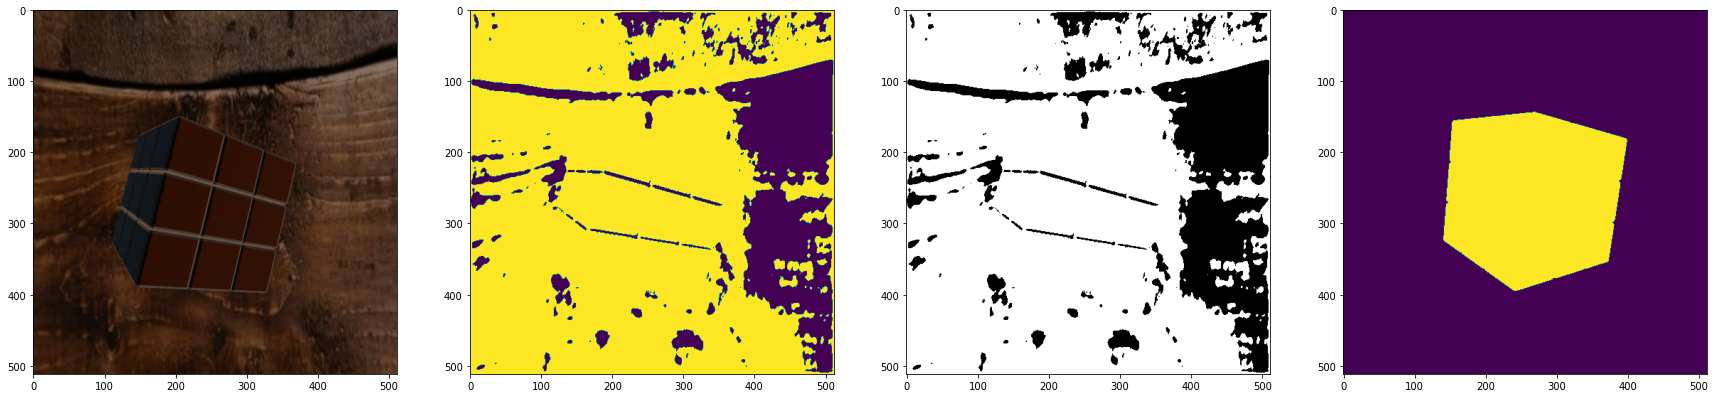

In [50]:
x = 10
imagaaa = val_generator_X[x]

plt.figure(figsize=(30,8))
plt.subplot(1,4,1)
im = skimage.img_as_ubyte(imagaaa[0])
plt.imshow(im)

plt.subplot(1,4,2)
pred = skimage.img_as_ubyte(model.predict(imagaaa)[0])
plt.imshow(pred)

plt.subplot(1,4,3)
pred = skimage.img_as_ubyte(model.predict(imagaaa)[0])
plt.imshow(pred, 'gray')

plt.subplot(1,4,4)
mask = skimage.img_as_ubyte(train_generator_y[x][0]).reshape((512, 512))
plt.imshow(mask)

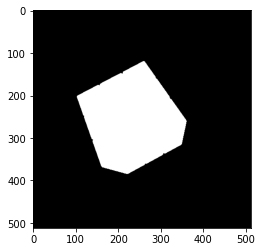

In [51]:
mask = skimage.img_as_ubyte(train_generator_y[0][0]).reshape((512, 512))
plt.imshow(mask, 'gray')

In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=0)
    pred_mask = pred_mask[tf.newaxis,: ]
    print(pred_mask.shape)
    return pred_mask[0]



In [ ]:
from skimage.transform import resize

image_0 = skimage.io.imread('Cube/features/SampleScene_170_img.png')
image_1 = resize(skimage.io.imread('Cube/1247683.png'),(512, 512))
image_2 = resize(skimage.io.imread('Cube/IMG_8283.JPG'),(512, 512))
image_3 = skimage.io.imread('BBBC018_v1_images-fixed/train/00736-actin.DIB.bmp')
images = [image_0, image_1,image_2,image_3]

def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return float(pred_mask[0][0])

ss = images[2]

s = np.array([ss,ss])
mask = skimage.img_as_ubyte(model.predict(s)[0])

print(create_mask(mask))

mm = (mask > create_mask(mask)/2) * 1


plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(mask)

plt.subplot(1,2,2)
plt.imshow(mm)
mask

# show_pred(images[2])

In [ ]:
# re_mask

In [ ]:
image = skimage.io.imread('BBBC018_v1_outlines/train/00735-cells.png')
image2 = skimage.io.imread('test/Cube/target/SampleScene_77_layer.png.png') 

In [ ]:
from skimage import filters
from skimage.data import camera
from skimage.util import compare_images
edge_roberts = filters.roberts(image2)

In [ ]:
edge_roberts = filters.sobel(image2)

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
# im = skimage.img_as_ubyte(s[0])
plt.imshow(edge_roberts)

# print(image[240:250,240:250])
# print(image2[240:250,240:250])

In [ ]:
# s = np.array([image,image])

In [ ]:
# mask
train_generator_y[0][0].reshape(512,512)

In [ ]:
train_generator_y[0][0][:,:,0][120:250,220:250]

In [ ]:
pred[0:250,220:250]

In [ ]:
mask[0:250,220:250]

In [ ]:
model.save('saved_model/my_model_50_50_10')

In [ ]:
# from PIL import Image
# import numpy as np
# from skimage import transform
# image = skimage.io.imread('Cube/features/SampleScene_170_img.png')
# s = np.array([image,image])
# print(s.shape)
# im = skimage.img_as_ubyte(s[0])
# im = skimage.img_as_ubyte(model.predict(s))

# def load(filename):
#     np_image = Image.open(filename)
#     np_image = np.array(np_image).astype('float32')/255
#     np_image = transform.resize(np_image, (512, 512, 3))
#     np_image = np.expand_dims(np_image, axis=0)
#     return np_image[0]

# image = load('Cube/features/SampleScene_170_img.png')
# print(image.shape)
# s = np.array([image,image])
# print(s.shape)
# s = model.predict(s)
# plt.imshow(s[0])

# # plt.imshow(create_mask(im))
# # create_mask(im)

# # create_mask(im)